In [53]:
import pandas as pd
import statsmodels.api as sm
df = pd.read_csv('data_6_4.csv')
df['const'] = 1
df

,chol,age,bmi,const
0,5.94,52,20.7,1
1,4.71,46,21.3,1
2,5.86,51,25.4,1
3,6.52,44,22.7,1
4,6.80,70,23.9,1
5,5.23,33,24.3,1
6,4.97,21,22.2,1
7,8.78,63,26.2,1
8,5.13,56,23.3,1
9,6.74,54,29.2,1


In [54]:
model_age = sm.GLM(df['chol'].to_numpy(), df[['age', 'const']], family = sm.families.Gamma())
results_age = model_age.fit()
print(results_age.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                   30
Model:                            GLM   Df Residuals:                       28
Model Family:                   Gamma   Df Model:                            1
Link Function:          inverse_power   Scale:                        0.029757
Method:                          IRLS   Log-Likelihood:                -42.884
Date:                Sat, 30 Apr 2022   Deviance:                      0.88536
Time:                        00:14:47   Pearson chi2:                    0.833
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4283
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0015      0.000     -4.108      0.0

c:\users\ilija\onedrive\desktop\rm\exercises\venv\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


In [55]:
model_age_bmi = sm.GLM(df['chol'].to_numpy(), df[['age', 'bmi', 'const']], family = sm.families.Gamma())
results_age_bmi = model_age_bmi.fit()
print(results_age_bmi.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                   30
Model:                            GLM   Df Residuals:                       27
Model Family:                   Gamma   Df Model:                            2
Link Function:          inverse_power   Scale:                        0.026578
Method:                          IRLS   Log-Likelihood:                -40.317
Date:                Sat, 30 Apr 2022   Deviance:                      0.74482
Time:                        00:14:47   Pearson chi2:                    0.718
No. Iterations:                     6   Pseudo R-squ. (CS):             0.5517
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0012      0.000     -3.158      0.0

c:\users\ilija\onedrive\desktop\rm\exercises\venv\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


In [56]:
D0, D1 = results_age.deviance, results_age_bmi.deviance
dof0, dof1 = results_age.df_resid, results_age_bmi.df_resid

In [57]:
F = ((D0 - D1) / (dof0 - dof1)) / (D1 / dof1)
F

5.094818033664616

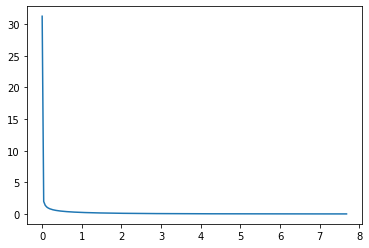

In [58]:
import numpy as np
from scipy.stats import f
import matplotlib.pyplot as plt
x = np.linspace(f.ppf(0.01, dof0 - dof1, dof1),
                f.ppf(0.99, dof0 - dof1, dof1), 200)
y = np.array([f.pdf(x_i, dof0 - dof1, dof1) for x_i in x])
plt.plot(x, y)

In [59]:
c = f.ppf(0.95, dof0 - dof1, dof1)
reject_null = F > c
print(f'reject null at 5% significance: {reject_null}')

reject null at 5% significance: True
